### professional
#### hypothesis
horizontal

vertical

downside risk

portofolio analysis -> mean & sharpe

h1. your 'entry-exit-rule & parameter' is good

h2. your 'weights' is good

#### experiment
different markets

#### argue
incosistent=

#### skill
s1. market selecting

#### risk
r1. margin call

#### procedure
1. position sizing
2. portofolio analysis is continuious redistribution, which is not practical
3. reblancing is to execute continuious redistribution, or approximation?

ignore existence of rolling

instrument-level
pd.Series(Capital) * Const(Leverage)

portofolio-level
ignore existence of leverage
Const(weight)
        returnsA
        returnsB
        returnsC
pd.Series(Capital)
    without-reblancing 
    period-reblancing 
    continuouse-reblancing
    
    
        


practive
simulation



### user-experience
cost: capital C

benefit: portfolio experiencing at different time-period

b1. use as much leverage as possible,  leverage has to be dynamic, not fixed

In [ ]:
from ctse.systems.ct_system import ct_system
from syscore.pdutils import pd_readcsv
from Measures import Measures
from ctse.sysobjects.ctse_strategy_backtest import ctseStrategyBacktest
import matplotlib.pyplot as plt

inss  = ct_system(capital_correction_method='syscore.capital.full_compounding').data.get_instrument_list()

for risk_target in [12, 16, 20, 24, 28, 30]:
    for ins in inss:
        tmp = pd_readcsv(r'../../ctse/data/tmp/{}_{}.csv'.format(ins, risk_target), date_index_name='index')
        
        # tmp = tmp[['tr_nav_of_product', 'leveraged_nav']]
        # tmp['leveraged_nav'].tail(100).plot()

        tmp = tmp['leverage_factor']
        tmp .plot()
        # measures = Measures(tmp, ctseStrategyBacktest.DATETIME, 'leveraged_nav')   
    plt.show()



2022-10-14 16:28:01 {'type': 'csvFuturesSimData'} [Warning] No key for csvFxPricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2022-10-14 16:28:01 {'type': 'csvFuturesSimData'} [Warning] No key for csvRollParametersData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
Private configuration private.private_config.yaml does not exist; no problem if running in sim mode


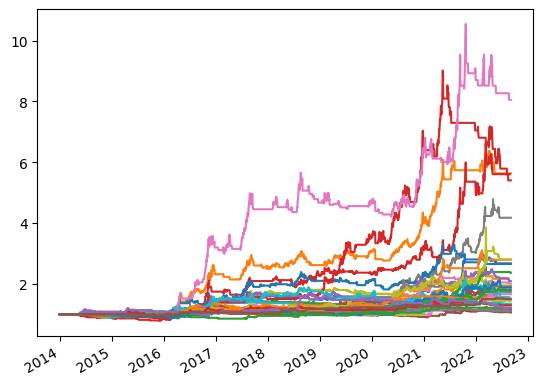

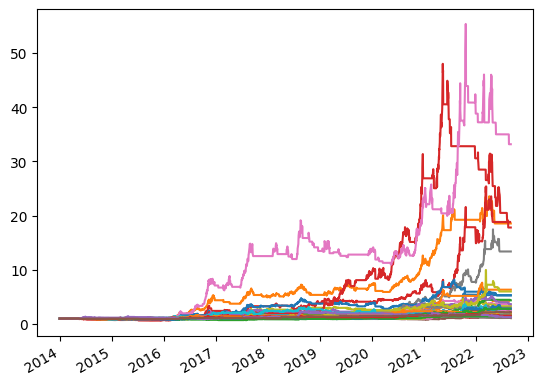

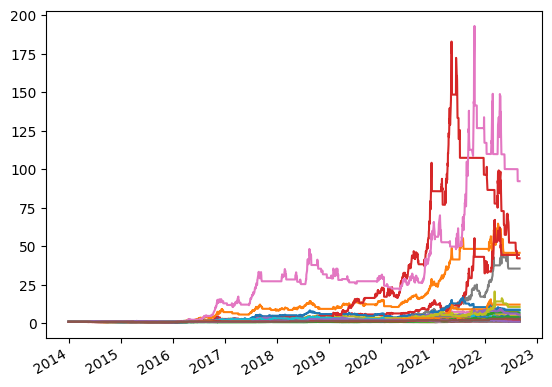

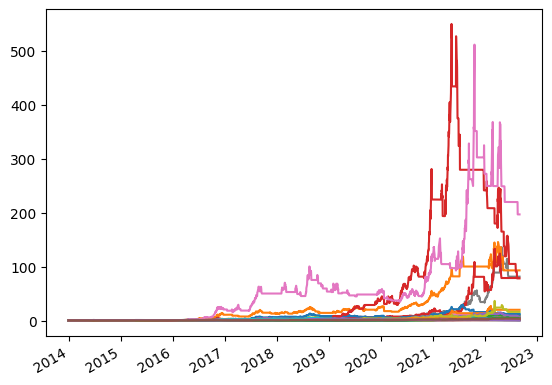

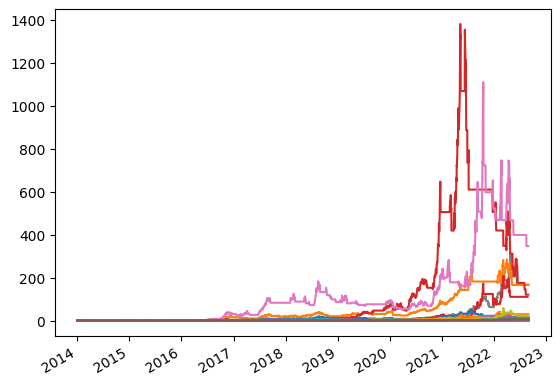

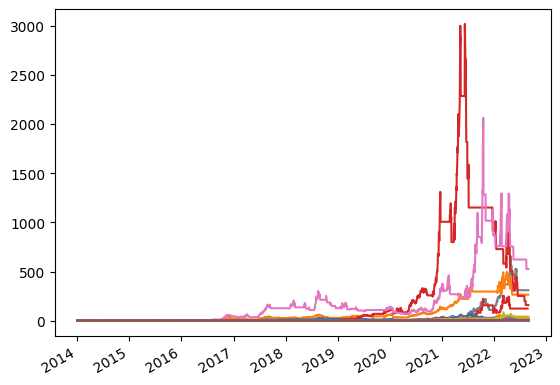

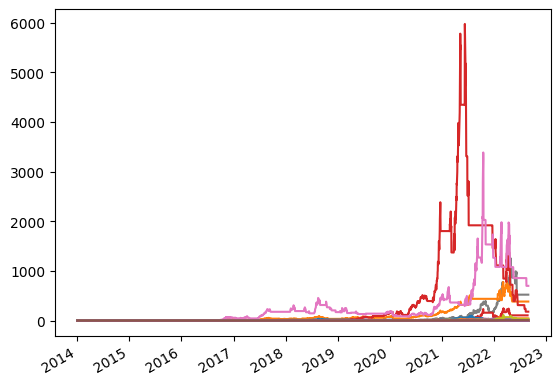

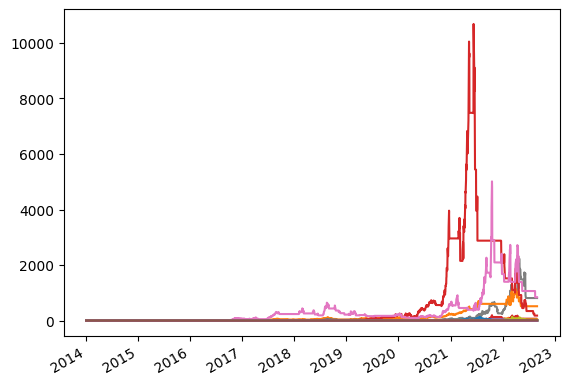

In [4]:
from ctse.systems.ct_system import ct_system
from syscore.pdutils import pd_readcsv
from Measures import Measures
from ctse.sysobjects.ctse_strategy_backtest import ctseStrategyBacktest
import matplotlib.pyplot as plt

inss  = ct_system(capital_correction_method='syscore.capital.full_compounding').data.get_instrument_list()

for risk_target in range(1, 9):
    for ins in inss:
        tmp = pd_readcsv(r'../../ctse/data/tmp/get_leveraged_returns/{}_{}.csv'.format(ins, risk_target), date_index_name='index')
        
        tmp = tmp[['tr_nav_of_product', 'leveraged_nav']]
        tmp['leveraged_nav'].plot()
        
        # measures = Measures(tmp, ctseStrategyBacktest.DATETIME, 'leveraged_nav')   
    plt.show()



2022-10-14 16:03:20 {'type': 'csvFuturesSimData'} [Warning] No key for csvFxPricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2022-10-14 16:03:20 {'type': 'csvFuturesSimData'} [Warning] No key for csvRollParametersData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
Private configuration private.private_config.yaml does not exist; no problem if running in sim mode


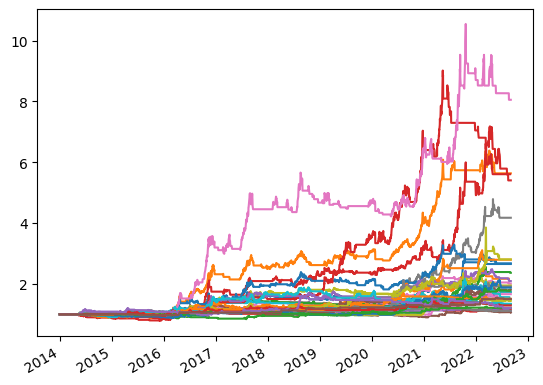

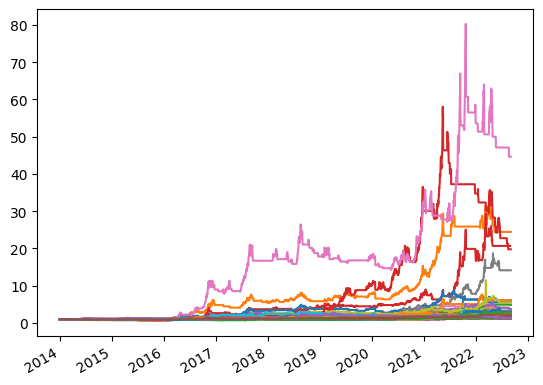

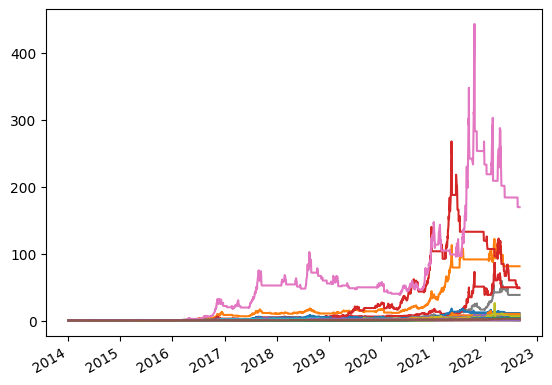

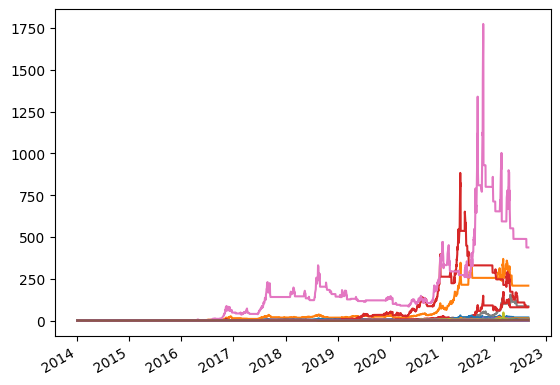

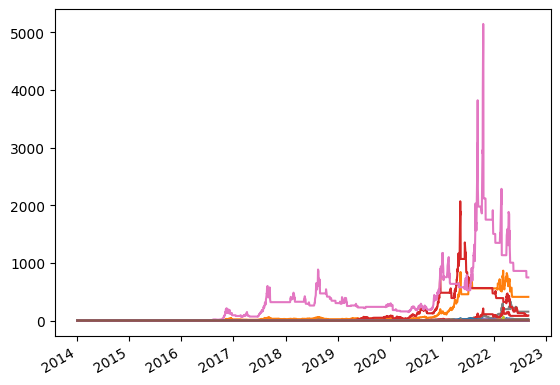

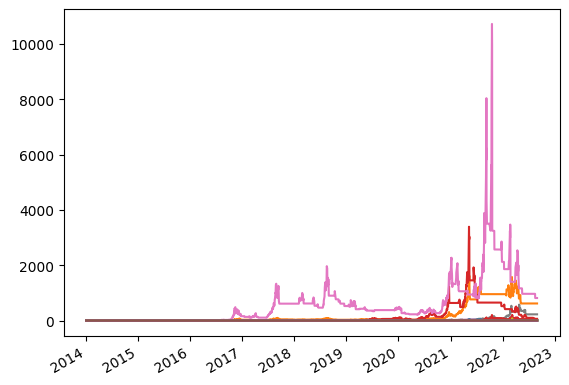

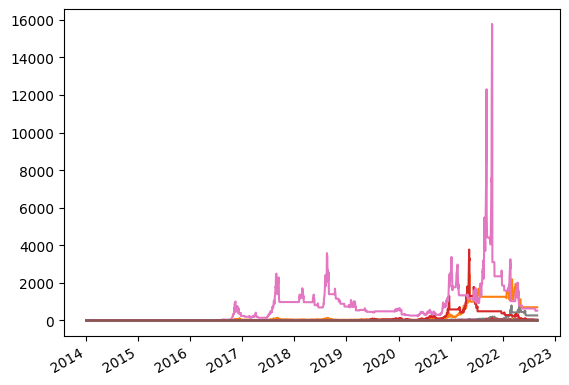

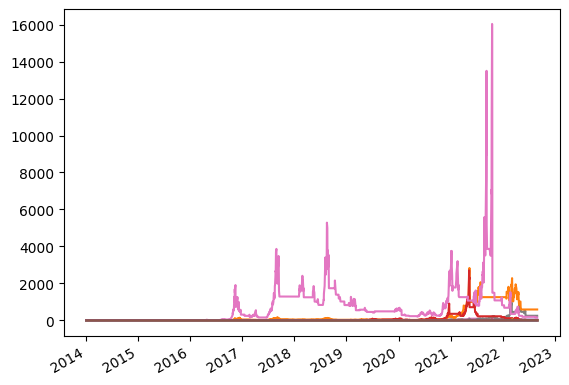

In [3]:
from ctse.systems.ct_system import ct_system
from syscore.pdutils import pd_readcsv
from Measures import Measures
from ctse.sysobjects.ctse_strategy_backtest import ctseStrategyBacktest
import matplotlib.pyplot as plt

inss  = ct_system(capital_correction_method='syscore.capital.full_compounding').data.get_instrument_list()

for risk_target in range(1, 9):
    for ins in inss:
        tmp = pd_readcsv(r'../../ctse/data/tmp/{}_{}.csv'.format(ins, risk_target), date_index_name='index')
        
        tmp = tmp['tr_nav_of_product']
        (tmp.pct_change() * risk_target + 1).cumprod().plot()
        
        # measures = Measures(tmp, ctseStrategyBacktest.DATETIME, 'leveraged_nav')   
    plt.show()



In [ ]:
from sympy import symbols, simplify
c, L, r1, r2, r3, r4 = symbols('c L r1 r2 r3 r4')

nc1 = c * L * (1 + r1)
nc2 =nc1 * (1 + r2)
nc3 =nc2 * (1 + r3)
nc4 =nc3 * (1 + r4)


c1 = nc1 - c * (L - 1)
c2 = nc2 -  c * (L - 1)
c3 = nc3 -  c * (L - 1)
c4 = nc4 -  c * (L - 1)

lr1 = simplify(c1 / c - 1)
lr2 = simplify(c2 / c1 - 1)
lr3 = simplify(c3 / c2 - 1)
lr4 = simplify(c4 / c3 - 1)
lr1.subs([(L, 2), (r1, 0.1), (r2, -0.1), (r3, 0.1), (r4, -0.1)])


0.200000000000000

2022-10-13 17:11:07 {'type': 'csvFuturesSimData'} [Warning] No key for csvFxPricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2022-10-13 17:11:07 {'type': 'csvFuturesSimData'} [Warning] No key for csvRollParametersData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
Private configuration private.private_config.yaml does not exist; no problem if running in sim mode
AL


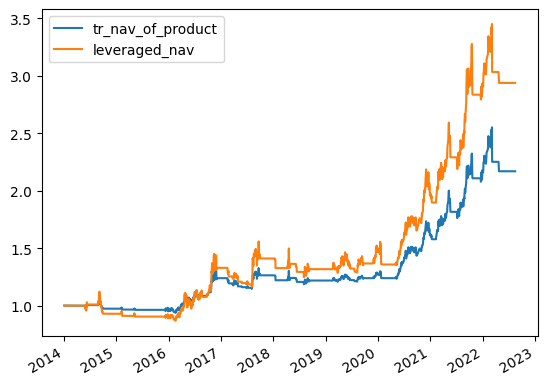

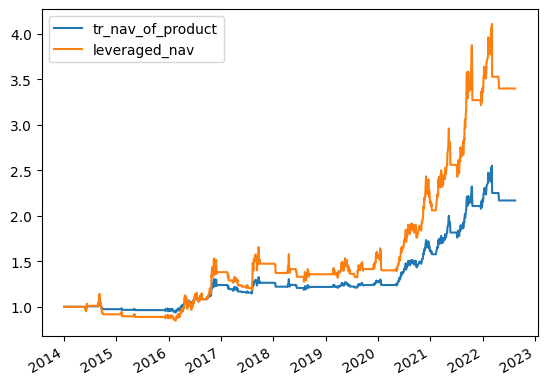

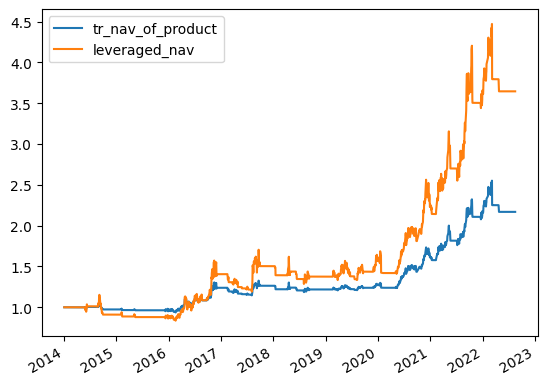

In [19]:
from ctse.systems.ct_system import ct_system
from syscore.pdutils import pd_readcsv
 
inss  = ct_system(capital_correction_method='syscore.capital.full_compounding').data.get_instrument_list()
i = 1
for ins in inss[i:i+1]:
    print(ins)
    for risk_target in [24, 28, 30]:
        tmp = pd_readcsv(r'../../ctse/data/tmp/{}_{}.csv'.format(ins, risk_target), date_index_name='index')[['tr_nav_of_product', 'leveraged_nav']]
        tmp.plot()
    break

<AxesSubplot:xlabel='index'>

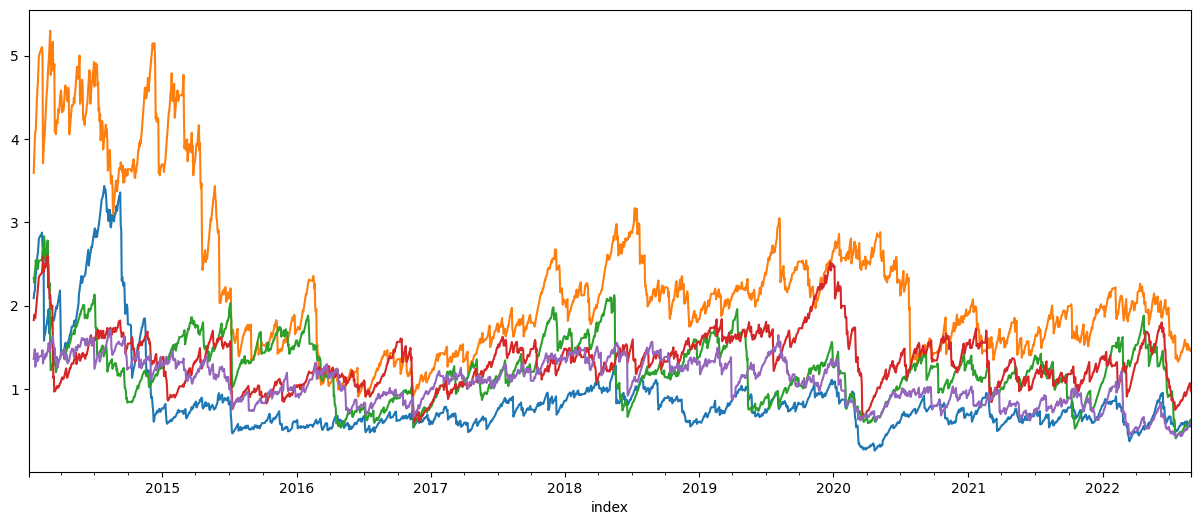

In [11]:
csv.iloc[:, 3:8].plot(figsize=(15,6), legend=False)